In [2]:
from pytorch_forecasting import NBeats

In [3]:
!ls /ssd003/projects/forecasting_bootcamp/bootcamp_datasets

boc_exchange	 exchange_rate		  store-sales-time-series-forecasting
can_weather	 illness		  traffic
connex_ontario	 m5-forecasting-accuracy  weather
cpi_forecasting  physionet.org		  weather_bench
electricity	 rbc_cpi_data
ETT-small	 rbc_cpi_datasets


In [1]:
if 'google.colab' in str(get_ipython()):
    !pip install prophet
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    !pip install sktime
    

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sktime.forecasting.naive import NaiveForecaster
from prophet import Prophet
from neuralprophet import NeuralProphet

## Load data 

In [3]:
df = pd.read_csv("BTC-USD.csv")

In [21]:
eth = pd.read_csv("ETH-USD.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [22]:
df = df.set_index('Date')

KeyError: "None of ['Date'] are in the columns"

In [23]:
eth = eth.set_index('Date')

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03
mean,12806.151070,13132.454827,12440.424083,12809.894345,12809.894345,1.631177e+10
std,16289.084491,16706.723386,15805.387121,16284.071793,16284.071793,2.009481e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,664.921997,675.403015,654.208984,665.122986,665.122986,9.794290e+07
50%,6919.979980,7145.865723,6756.680176,6932.480469,6932.480469,6.966180e+09
75%,16352.028320,16920.765625,15749.193359,16353.365234,16353.365234,2.814822e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [10]:
plt.rcParams.update({'figure.figsize':(20,6), 'figure.dpi':120})

<AxesSubplot:xlabel='Date'>

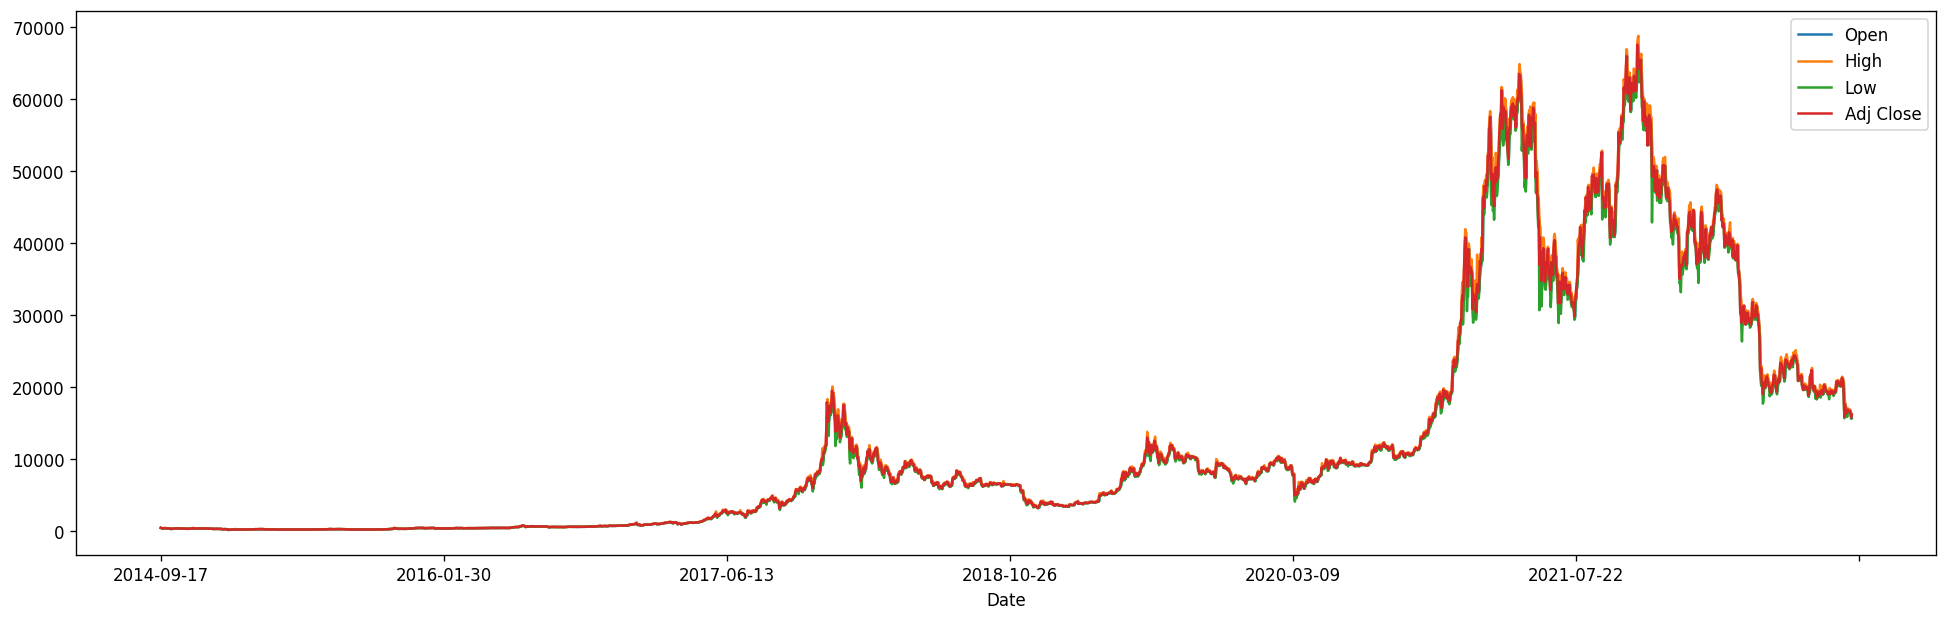

In [14]:
df.plot(y=['Open','High','Low','Adj Close'])

In [29]:
df['open_close_diff'] = (df['Adj Close'] - df['Open'])/df['Open']

<AxesSubplot:xlabel='Date'>

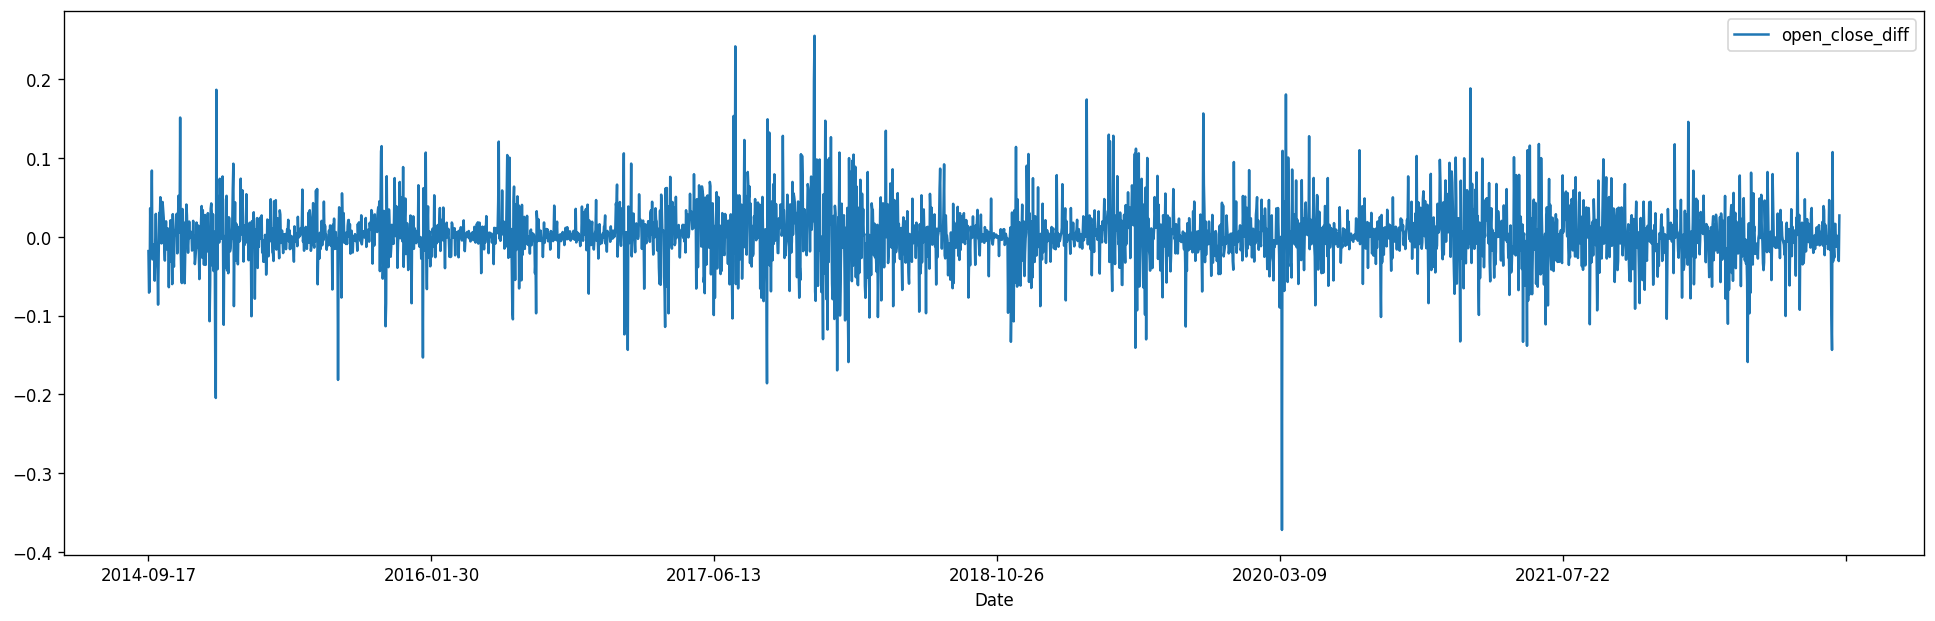

In [30]:
df.plot(y=['open_close_diff'])

<AxesSubplot:xlabel='Date'>

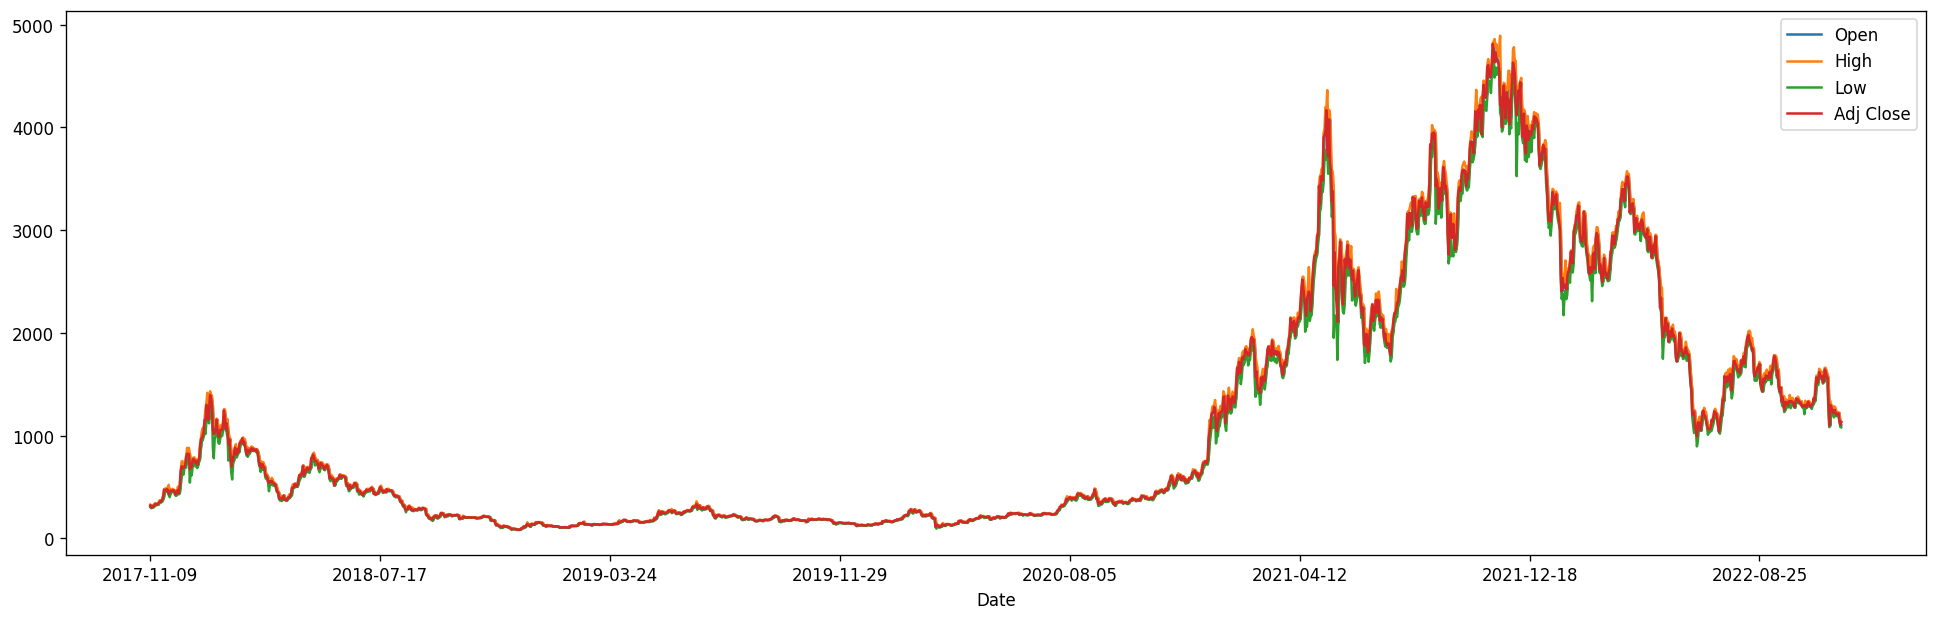

In [25]:
eth.plot(y=['Open','High','Low','Adj Close'])

In [24]:
eth

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...
2022-11-18,1200.802124,1226.737427,1200.802124,1212.300293,1212.300293,7979913378
2022-11-19,1212.215454,1227.837280,1200.475586,1218.426758,1218.426758,5978745776
2022-11-20,1218.436279,1224.077759,1137.933228,1142.466675,1142.466675,9651002684


In [19]:
df_filtered = df.loc['2020-11-01':'2022-11-22',:]

<AxesSubplot:xlabel='Date'>

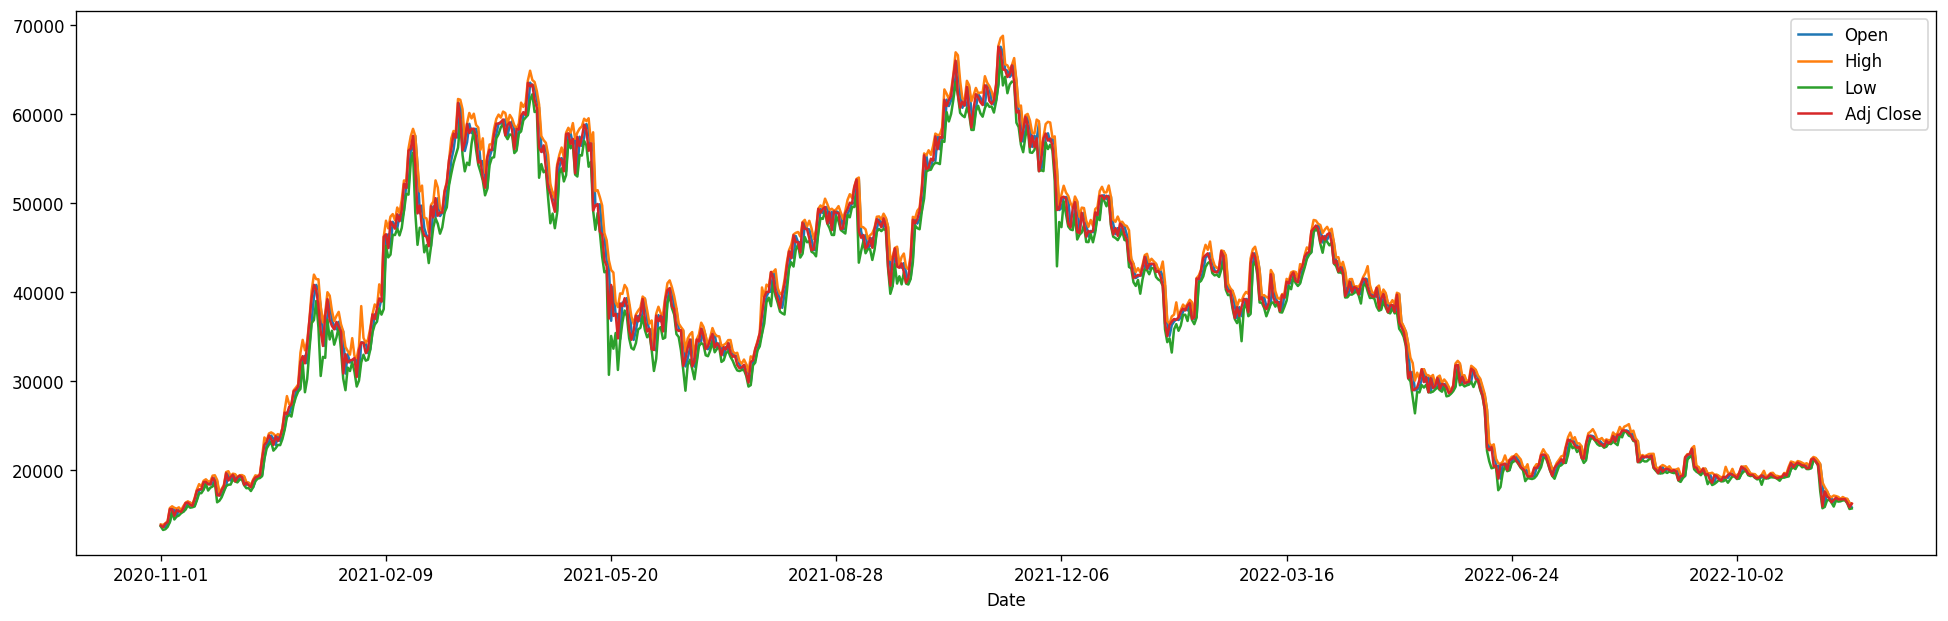

In [20]:
df_filtered.plot(y=['Open','High','Low','Adj Close'])